Covid - 19 Vaccination Progress around the world and India is in comparision seperately

#### Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

#### Import and explore the dataset

In [ ]:
dataset = pd.read_csv('drive/MyDrive/Datasets/country_vaccinations.csv')
dataset.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [ ]:
print(dataset.shape)

(3396, 15)


In [ ]:
dataset.country.unique()

array(['Albania', 'Algeria', 'Andorra', 'Anguilla', 'Argentina',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium',
       'Bermuda', 'Bolivia', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada',
       'Cayman Islands', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic',
       'Ecuador', 'Egypt', 'England', 'Estonia', 'Faeroe Islands',
       'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Greenland',
       'Guernsey', 'Guyana', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Japan',
       'Jersey', 'Kuwait', 'Latvia', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Monaco',
       'Morocco', 'Myanmar', 'Nepal', 'Netherlands', 'Northern Cyprus',
       'Northern Ireland', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Peru',
       'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saint Helena',
     

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              3396 non-null   object 
 1   iso_code                             3132 non-null   object 
 2   date                                 3396 non-null   object 
 3   total_vaccinations                   2225 non-null   float64
 4   people_vaccinated                    1833 non-null   float64
 5   people_fully_vaccinated              1186 non-null   float64
 6   daily_vaccinations_raw               1861 non-null   float64
 7   daily_vaccinations                   3264 non-null   float64
 8   total_vaccinations_per_hundred       2225 non-null   float64
 9   people_vaccinated_per_hundred        1833 non-null   float64
 10  people_fully_vaccinated_per_hundred  1186 non-null   float64
 11  daily_vaccinations_per_million

In [ ]:
dataset.isnull().sum()

country                                   0
iso_code                                264
date                                      0
total_vaccinations                     1171
people_vaccinated                      1563
people_fully_vaccinated                2210
daily_vaccinations_raw                 1535
daily_vaccinations                      132
total_vaccinations_per_hundred         1171
people_vaccinated_per_hundred          1563
people_fully_vaccinated_per_hundred    2210
daily_vaccinations_per_million          132
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [ ]:
dataset.nunique()

country                                  94
iso_code                                 90
date                                     67
total_vaccinations                     2123
people_vaccinated                      1764
people_fully_vaccinated                1121
daily_vaccinations_raw                 1729
daily_vaccinations                     2597
total_vaccinations_per_hundred          923
people_vaccinated_per_hundred           775
people_fully_vaccinated_per_hundred     311
daily_vaccinations_per_million         1874
vaccines                                 18
source_name                              56
source_website                           90
dtype: int64

As we see there are 94 countries, but only 90 iso country code for each of them, hence 4 of the countries shouldnt have iso code

In [ ]:
dataset[dataset['iso_code'].isnull()]['country'].value_counts()

Wales               66
England             66
Scotland            66
Northern Ireland    66
Name: country, dtype: int64

Filling the above null values in iso code with something (ABS) - ie absent

In [ ]:
dataset['iso_code'] = dataset['iso_code'].fillna('ABS')
dataset.iso_code.isnull().sum().any()

False

Total Vaccinations are avaailable in each of the country/Country wise distribution

In [ ]:
total_vaccinations = dataset.groupby('country').sum()
total_vaccinations = total_vaccinations.sort_values(by = 'total_vaccinations',axis = 0, ascending = False)
pd.DataFrame(total_vaccinations.head())

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
country,,,,,,,,,
United States,1.080963e+09,851005685.0,210196912.0,43712969.0,51830013.0,323.21,254.48,62.84,154975.0
United Kingdom,3.471888e+08,328734963.0,18453832.0,13821578.0,15555473.0,511.41,484.22,27.17,229139.0
England,2.984112e+08,281247874.0,17163359.0,11557278.0,13154575.0,530.16,499.67,30.50,233707.0
Israel,1.915263e+08,134479695.0,57046579.0,6879189.0,6557144.0,2212.77,1553.67,659.08,757565.0
China,1.584870e+08,0.0,0.0,0.0,34922496.0,11.01,0.00,0.00,24255.0


In [ ]:
pd.DataFrame(total_vaccinations.tail())

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
country,,,,,,,,,
Mauritius,207.0,207.0,0.0,0.0,210.0,0.02,0.02,0.0,168.0
Japan,125.0,125.0,0.0,125.0,125.0,0.00,0.00,0.0,1.0
Saint Helena,107.0,0.0,0.0,0.0,0.0,1.76,0.00,0.0,0.0
Algeria,30.0,0.0,0.0,30.0,30.0,0.00,0.00,0.0,1.0
Colombia,18.0,18.0,0.0,18.0,18.0,0.00,0.00,0.0,0.0


#### Data Visualizations

In [ ]:
from plotly.offline import iplot

total_vacc = total_vaccinations[:15].sort_values(by = 'total_vaccinations')
plot_1 = go.Bar(x = total_vacc['total_vaccinations'], y = total_vacc.index, orientation= 'h')
fig = go.Figure(data = [plot_1])
fig.update_layout(title = 'Top 15 countries with Maximum Vaccinations')
fig.update_xaxes(title = 'Total Vaccinations')
fig.update_yaxes(title = 'Countries')

iplot(fig)

#### People Vaccinated and People fully Vaccinated 

In [ ]:
people_vaccinated_country = dataset.groupby('country').max().sort_values(by = 'people_vaccinated',ascending = False)[[                                                                                                                   
'people_vaccinated', 'people_fully_vaccinated']]
people_vaccinated_country.head()

,people_vaccinated,people_fully_vaccinated
country,,
United States,40268009.0,15471536.0
United Kingdom,15940972.0,558577.0
England,13395338.0,495704.0
Brazil,5326007.0,557532.0
Turkey,4477432.0,746170.0


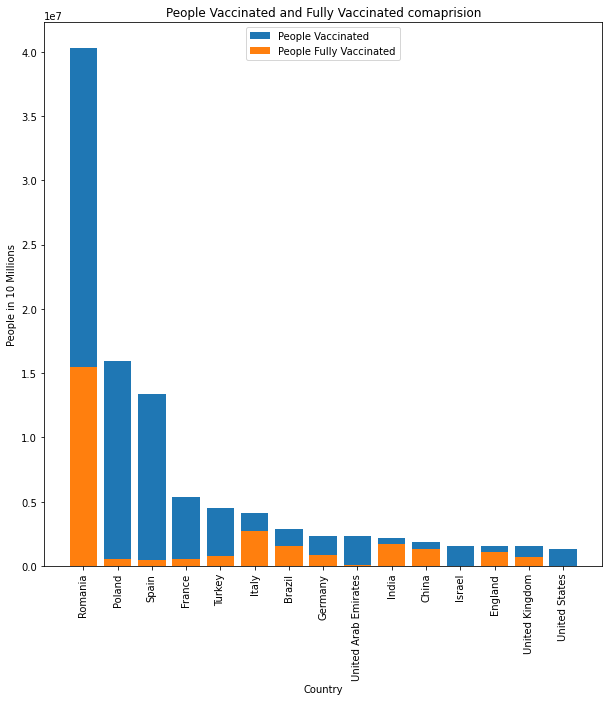

In [ ]:
people_vaccinated = people_vaccinated_country['people_vaccinated'].head(15)
people_fully_vaccinated = people_vaccinated_country['people_fully_vaccinated'].head(15)
fig, ax = plt.subplots(figsize = (10,10))
labels = total_vacc.head(15).index
ax.bar(labels, people_vaccinated, label = 'People Vaccinated')
ax.bar(labels, people_fully_vaccinated, label = 'People Fully Vaccinated')
ax.set_xticklabels(labels, rotation = 90)
ax.set_title('People Vaccinated and Fully Vaccinated comaprision')
ax.set_ylabel('People in 10 Millions')
ax.set_xlabel('Country')
ax.legend()
plt.show()

#### Vaccinations per Hundread

In [ ]:
vaccinations_per_hundread = dataset.groupby('country').max().sort_values('total_vaccinations_per_hundred',ascending = False)[['total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',	'people_fully_vaccinated_per_hundred']]
vaccinations_per_hundread.head()

,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
country,,,
Gibraltar,80.24,48.27,31.97
Israel,79.48,47.66,31.81
Seychelles,61.00,42.52,18.48
United Arab Emirates,53.43,8.46,2.53
Wales,26.02,25.61,0.41


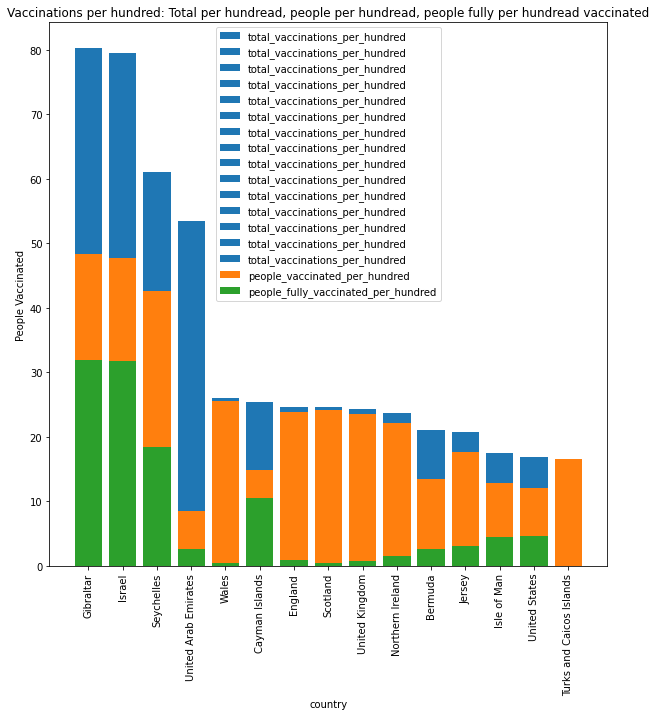

In [ ]:
total_vacc_per_hund = vaccinations_per_hundread['total_vaccinations_per_hundred'].head(15)
people_vacc_per_hund = vaccinations_per_hundread['people_vaccinated_per_hundred'].head(15)
people_fully_vacc_hund = vaccinations_per_hundread['people_fully_vaccinated_per_hundred'].head(15)
labels = vaccinations_per_hundread.head(15).index
fig, ax = plt.subplots(figsize = (10,10))
ax.bar(labels, total_vacc_per_hund, Label = 'total_vaccinations_per_hundred' )
ax.bar(labels, people_vacc_per_hund, label = 'people_vaccinated_per_hundred')
ax.bar(labels, people_fully_vacc_hund, label = 'people_fully_vaccinated_per_hundred')
ax.set_xticklabels(labels, rotation = 90)
ax.set_title('Vaccinations per hundred: Total per hundread, people per hundread, people fully per hundread vaccinated')
ax.set_ylabel('People Vaccinated')
ax.set_xlabel('country')
ax.legend()
plt.show()

#### Daily vaccinations per millions

In [ ]:
daily_vacc_per_mil = dataset.groupby('country').max().sort_values(by = 'daily_vaccinations_per_million', ascending = False)[
'daily_vaccinations_per_million']
print(daily_vacc_per_mil.head())
daily_vacc = dataset.groupby('country').max().sort_values(by = 'daily_vaccinations',ascending = False)['daily_vaccinations']
print(daily_vacc.head())

country
Gibraltar               30869.0
Seychelles              24415.0
Israel                  21319.0
United Arab Emirates    16179.0
Scotland                10255.0
Name: daily_vaccinations_per_million, dtype: float64
country
China             1916190.0
United States     1716311.0
United Kingdom     445204.0
England            376532.0
India              366795.0
Name: daily_vaccinations, dtype: float64


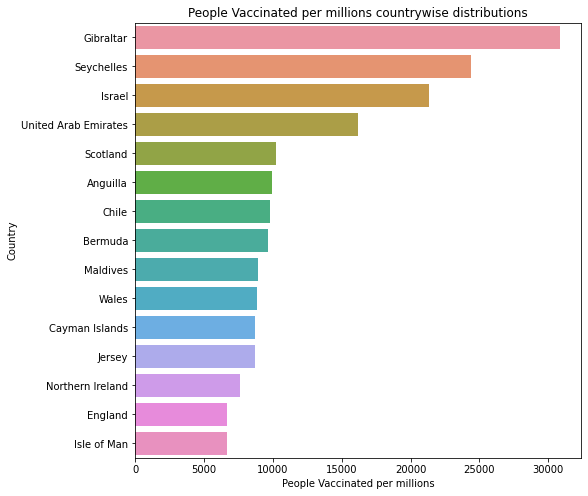

In [ ]:
daily_vaccinations_per_million = daily_vacc_per_mil.head(15).values
fig, ax = plt.subplots(figsize =(8,8))
labels = daily_vacc_per_mil.head(15).index
ax = sns.barplot(x = daily_vaccinations_per_million, y = labels)
ax.set_ylabel('Country')
ax.set_xlabel('People Vaccinated per millions')
ax.set_title('People Vaccinated per millions countrywise distributions')
plt.show()

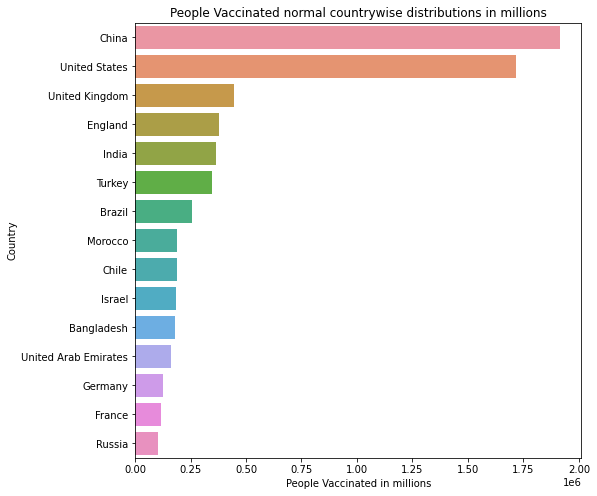

In [ ]:
daily_vaccinations = daily_vacc.head(15).values
fig, ax = plt.subplots(figsize =(8,8))
labels = daily_vacc.head(15).index
ax = sns.barplot(x = daily_vaccinations, y = labels)
ax.set_ylabel('Country')
ax.set_xlabel('People Vaccinated in millions')
ax.set_title('People Vaccinated normal countrywise distributions in millions')
plt.show()

Total Vaccinations progress considering India, It is country within top 10 vaccinations rates

#### Total Vaccinations comaprision wrt Date - India

In [ ]:
Total_vaccinations_india = dataset[dataset['country']== 'India'][['date', 'total_vaccinations']]
Total_vaccinations_india = Total_vaccinations_india.dropna()
Total_vaccinations_india.head()

,date,total_vaccinations
1444,2021-01-15,0.0
1445,2021-01-16,191181.0
1446,2021-01-17,224301.0
1447,2021-01-18,454049.0
1448,2021-01-19,674835.0


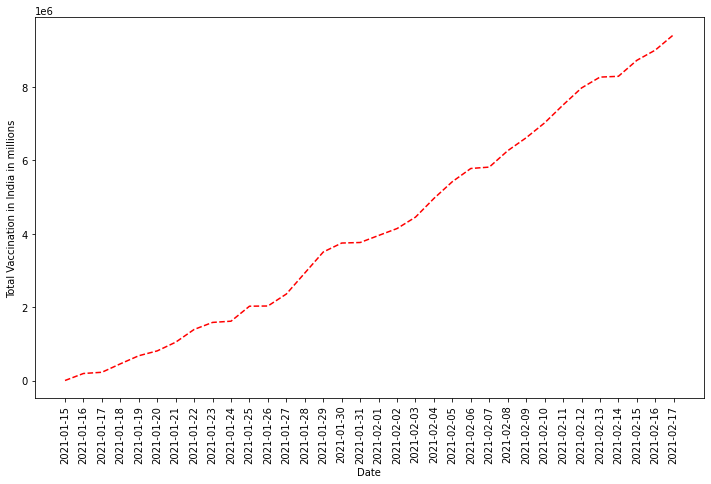

In [ ]:
x = Total_vaccinations_india['date']
y = Total_vaccinations_india['total_vaccinations']
figu, ax = plt.subplots(figsize = (12,7))
fig = sns.lineplot(data = Total_vaccinations_india, x= 'date',y = 'total_vaccinations', ax = ax,color = 'red',ls = '--')
fig.set(xlabel = 'Date', ylabel = 'Total Vaccination in India in millions')
plt.xticks(rotation = 90)
plt.show()

#### People Vaccinated and people fully vaccinated - United States

In [ ]:
people_vaccinated_US = dataset[dataset['country'] == 'United States'][['date', 'people_vaccinated','people_fully_vaccinated']]
people_vaccinated_US = people_vaccinated_US.dropna()
people_vaccinated_US.head()

,date,people_vaccinated,people_fully_vaccinated
3295,2021-01-14,9690757.0,1342086.0
3296,2021-01-15,10595866.0,1610524.0
3300,2021-01-19,13595803.0,2023124.0
3301,2021-01-20,14270441.0,2161419.0
3302,2021-01-21,15053257.0,2394961.0


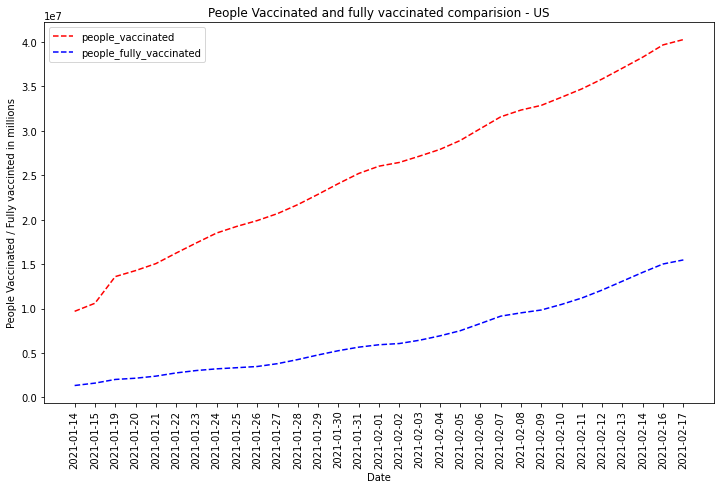

In [ ]:
x = people_vaccinated_US['date']
y = people_vaccinated_US['people_vaccinated']
z = people_vaccinated_US['people_fully_vaccinated']
fig, ax = plt.subplots(figsize = (12,7))
ax.plot(x, y, ls = '--',color = 'red', label = 'people_vaccinated')
ax.plot(x, z, ls = '--', color = 'blue', label ='people_fully_vaccinated')
ax.set_title('People Vaccinated and fully vaccinated comparision - US')
ax.set_xlabel('Date')
ax.set_ylabel('People Vaccinated / Fully vaccinted in millions')
ax.set_xticklabels(labels = x, rotation = 90)
ax.legend()
plt.show()

#### Vaccinations per Hundreads - United States

In [ ]:
vacc_per_hund_US = dataset[dataset['country'] == 'United States'][[
'date', 'total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred']]
vacc_per_hund_US = vacc_per_hund_US.dropna()
vacc_per_hund_US.head()

,date,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
3295,2021-01-14,3.33,2.90,0.40
3296,2021-01-15,3.67,3.17,0.48
3300,2021-01-19,4.70,4.07,0.60
3301,2021-01-20,4.94,4.27,0.65
3302,2021-01-21,5.25,4.50,0.72


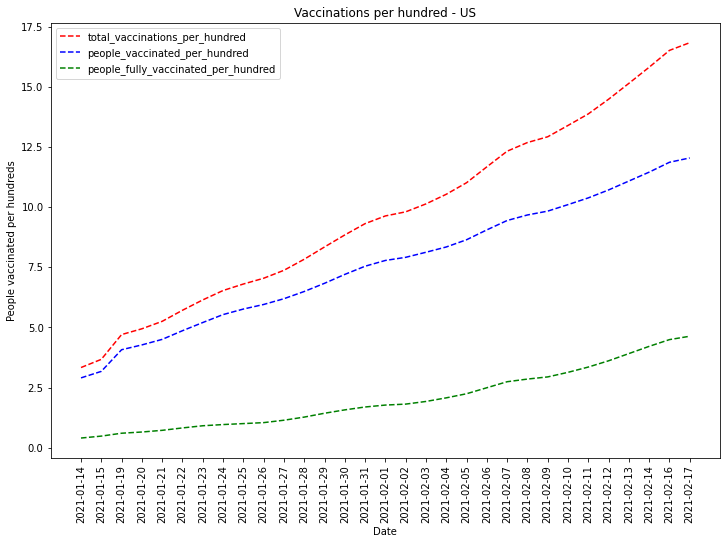

In [ ]:
x = vacc_per_hund_US['date']
y = vacc_per_hund_US['total_vaccinations_per_hundred']
z = vacc_per_hund_US['people_vaccinated_per_hundred']
w = vacc_per_hund_US['people_fully_vaccinated_per_hundred']
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(x,y, ls = '--', color = 'red', label = 'total_vaccinations_per_hundred')
ax.plot(x,z, ls = '--', color = 'blue', label = 'people_vaccinated_per_hundred')
ax.plot(x,w, ls = '--', color = 'green', label = 'people_fully_vaccinated_per_hundred')
ax.set_title('Vaccinations per hundred - US')
ax.set_xlabel('Date')
ax.set_ylabel('People vaccinated per hundreds')
ax.set_xticklabels(labels=x,rotation = 90)
ax.legend()
plt.show()

#### Daily Vaccinations per millions - United States

In [ ]:
daily_vacc_per_mil_US = dataset[dataset['country'] == 'United States'][['date','daily_vaccinations_per_million']]
daily_vacc_per_mil_US = daily_vacc_per_mil_US.dropna()
daily_vacc_per_mil_US.head()

,date,daily_vaccinations_per_million
3271,2020-12-21,173.0
3272,2020-12-22,381.0
3273,2020-12-23,450.0
3274,2020-12-24,571.0
3275,2020-12-25,644.0


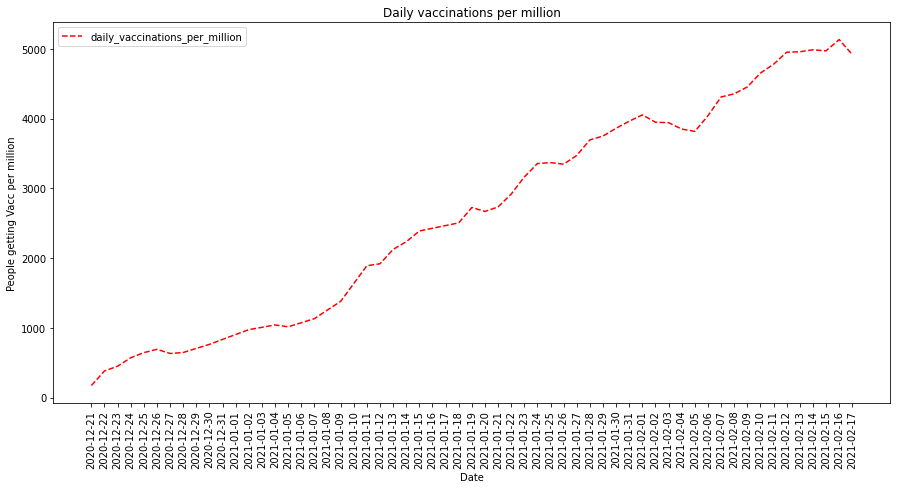

In [ ]:
x = daily_vacc_per_mil_US['date']
y = daily_vacc_per_mil_US['daily_vaccinations_per_million']
fig, ax = plt.subplots(figsize = (15,7))
ax.plot(x,y,ls = '--',color = 'red',label ='daily_vaccinations_per_million')
ax.set_title('Daily vaccinations per million')
ax.set_xlabel('Date')
ax.set_ylabel('People getting Vacc per million')
ax.set_xticklabels(labels = x, rotation = 90)
ax.legend()
plt.show()

#### Vaccines Availability

In [ ]:
print(dataset.vaccines.unique())
print(dataset.vaccines.nunique())

['Pfizer/BioNTech' 'Sputnik V' 'Oxford/AstraZeneca'
 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'
 'Oxford/AstraZeneca, Sputnik V' 'Pfizer/BioNTech, Sinopharm/Beijing'
 'Oxford/AstraZeneca, Sinovac' 'Sinopharm/Beijing'
 'Moderna, Pfizer/BioNTech' 'Pfizer/BioNTech, Sinovac'
 'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac'
 'Oxford/AstraZeneca, Pfizer/BioNTech' 'Covaxin, Oxford/AstraZeneca'
 'Sinovac' 'Oxford/AstraZeneca, Sinopharm/Beijing'
 'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V'
 'Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V'
 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V']
18


There are total 18 different Vaccines available

In [ ]:
vaccines = dataset.groupby('country').max().sort_values(by = 'vaccines', ascending = False)['vaccines']
pd.DataFrame(vaccines)

,vaccines
country,
Iran,Sputnik V
Bolivia,Sputnik V
Argentina,Sputnik V
Russia,Sputnik V
Algeria,Sputnik V
...,...
Ireland,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Netherlands,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Latvia,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"


In Some countries as following vaccines are used mainly

In [ ]:
print('Vaccines used in India:  ',vaccines.get(key = 'India'))
print('Vaccines used in United States:  ',vaccines.get(key = 'United_States'))
print('Vaccines used in Japan:  ',vaccines.get(key = 'Japan'))
print('Vaccines used in Russia:  ',vaccines.get(key = 'Russia'))
print('Vaccines used in China:  ',vaccines.get(key = 'China'))


Vaccines used in India:   Covaxin, Oxford/AstraZeneca
Vaccines used in United States:   None
Vaccines used in Japan:   Pfizer/BioNTech
Vaccines used in Russia:   Sputnik V
Vaccines used in China:   Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac
